In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('homepage_actions.csv')
df.head()

timestamp      id       group action
0  2016-09-24 17:42:27.839496  804196  experiment   view
1  2016-09-24 19:19:03.542569  434745  experiment   view
2  2016-09-24 19:36:00.944135  507599  experiment   view
3  2016-09-24 19:59:02.646620  671993     control   view
4  2016-09-24 20:26:14.466886  536734  experiment   view

### 1. Match the following characteristics of this dataset: 
- total number of actions
- number of unique users
- sizes of the control and experiment groups (i.e., the number of unique users in each group)

In [ ]:
# total number of actions


In [ ]:
# number of unique users


In [ ]:
# size of control group and experiment group


### 2. How long was the experiment run for? 
Hint: the records in this dataset are ordered by timestamp in increasing order

In [ ]:
# duration of this experiment


### 3. What action types are recorded in this dataset?
(i.e., What are the unique values in the action column?)

In [ ]:
# action types in this experiment


### 4. Why would we use click through rate instead of number of clicks to compare the performances of control and experiment pages?

Answer

### 5. Define the click through rate (CTR) for this experiment.

Answer

### 6. What are the null and alternative hypotheses?
Use $CTR_{old}$ and $CTR_{new}$ in your hypotheses.

$$H_0: $$
$$H_1: $$

# Extra

In [11]:
control_df = df.query('group == "control"')

In [12]:
control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()

In [13]:
control_ctr

0.2797118847539016

In [14]:
experiment_df = df.query('group == "experiment"')
experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()

In [15]:
experiment_ctr

0.3097463284379172

In [16]:
obs_diff = experiment_ctr - control_ctr
obs_diff

0.030034443684015644

In [2]:
diffs = []
for _ in range(10000):
    b_samp = df.sample(df.shape[0], replace = True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()
    experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr - control_ctr)

(array([  19.,  140.,  768., 1981., 3029., 2536., 1162.,  318.,   42.,
           5.]),
 array([-0.01386926, -0.00456479,  0.00473967,  0.01404414,  0.02334861,
         0.03265308,  0.04195755,  0.05126201,  0.06056648,  0.06987095,
         0.07917542]),
 <a list of 10 Patch objects>)

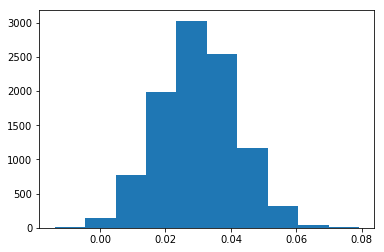

In [3]:
plt.hist(diffs)

In [8]:
diffs = np.array(diffs)
null_vals = np.random.normal(0, diffs.std(), diffs.size)

(array([   6.,   82.,  541., 1819., 3204., 2777., 1218.,  318.,   31.,
           4.]),
 array([-0.04802286, -0.03811085, -0.02819883, -0.01828682, -0.00837481,
         0.0015372 ,  0.01144921,  0.02136123,  0.03127324,  0.04118525,
         0.05109726]),
 <a list of 10 Patch objects>)

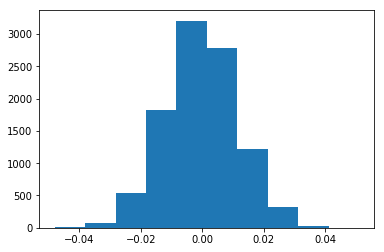

In [9]:
plt.hist(null_vals)

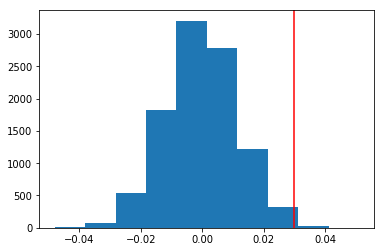

In [17]:
plt.hist(null_vals);
plt.axvline(x = obs_diff, color = 'red');

In [19]:
(null_vals > obs_diff).mean()

0.0057